In [1]:
import pandas as pd
import numpy as np

 データの読み込み

In [2]:
df = pd.read_csv('./cbb19.csv')

In [3]:
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,Gonzaga,WCC,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,...,35.3,25.9,61.4,43.4,36.3,30.4,72.0,7.0,E8,1.0
1,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,29.1,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0
2,Duke,ACC,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,...,33.2,24.0,58.0,45.0,30.8,29.9,73.6,11.2,E8,1.0
3,North Carolina,ACC,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,...,30.2,28.4,52.1,47.9,36.2,33.5,76.0,10.0,S16,1.0
4,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,27.5,24.1,51.8,44.3,34.2,29.1,65.9,9.2,S16,2.0


 勝率データ（ser_ratio）の作成

In [4]:
# 試合数
ser_game = df['G']
print(ser_game)

0      37
1      38
2      38
3      36
4      37
       ..
348    27
349    27
350    30
351    29
352    30
Name: G, Length: 353, dtype: int64


In [5]:
# 勝利数
ser_win = df['W']
print(ser_win)

0      33
1      35
2      32
3      29
4      30
       ..
348    10
349     5
350     3
351     6
352     7
Name: W, Length: 353, dtype: int64


In [6]:
# 勝率 = 勝利数 / 試合数
ser_ratio = ser_win / ser_game

In [7]:
print(ser_ratio)

0      0.891892
1      0.921053
2      0.842105
3      0.805556
4      0.810811
         ...   
348    0.370370
349    0.185185
350    0.100000
351    0.206897
352    0.233333
Length: 353, dtype: float64


データクレンジング

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 23 columns):
TEAM          353 non-null object
CONF          353 non-null object
G             353 non-null int64
W             353 non-null int64
ADJOE         353 non-null float64
ADJDE         353 non-null float64
BARTHAG       353 non-null float64
EFG_O         353 non-null float64
EFG_D         353 non-null float64
TOR           353 non-null float64
TORD          353 non-null float64
ORB           353 non-null float64
DRB           353 non-null float64
FTR           353 non-null float64
FTRD          353 non-null float64
2P_O          353 non-null float64
2P_D          353 non-null float64
3P_O          353 non-null float64
3P_D          353 non-null float64
ADJ_T         353 non-null float64
WAB           353 non-null float64
POSTSEASON    68 non-null object
SEED          68 non-null float64
dtypes: float64(18), int64(2), object(3)
memory usage: 63.6+ KB


欠損値のある列（POSTSEASON, SEED）の削除

In [9]:
df = df.drop(["POSTSEASON", "SEED"], axis=1)

In [10]:
df.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,31.745042,17.113314,103.335977,103.336261,0.493214,50.600850,50.774504,18.606516,18.523513,28.245892,28.420397,32.954391,33.202550,50.060057,50.233994,34.287819,34.415864,69.168555,-7.783569
std,2.514195,6.374993,7.020019,6.452597,0.253006,2.938629,2.752896,2.066711,2.092719,3.938373,2.923335,4.708719,5.080133,3.362801,3.122286,2.537098,2.336075,2.694397,7.120550
min,26.000000,3.000000,83.700000,85.200000,0.034600,40.000000,42.500000,13.500000,13.300000,15.900000,21.700000,21.900000,21.800000,37.700000,40.700000,27.900000,27.900000,60.700000,-23.400000
25%,30.000000,12.000000,98.600000,98.700000,0.281400,48.800000,48.900000,17.200000,17.100000,25.400000,26.300000,29.900000,29.700000,47.700000,48.300000,32.400000,32.900000,67.300000,-13.100000
50%,31.000000,17.000000,103.100000,104.000000,0.476200,50.500000,50.900000,18.500000,18.300000,28.300000,28.300000,33.300000,32.700000,50.300000,50.200000,34.200000,34.400000,69.000000,-8.600000
75%,33.000000,21.000000,107.700000,107.800000,0.689300,52.800000,52.600000,19.800000,19.800000,31.000000,30.400000,35.900000,36.400000,52.200000,52.200000,36.000000,35.900000,70.800000,-3.100000
max,39.000000,35.000000,123.400000,119.200000,0.974400,59.000000,59.300000,25.100000,24.700000,38.700000,37.100000,48.100000,54.000000,61.400000,61.200000,42.400000,41.800000,79.100000,11.200000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 21 columns):
TEAM       353 non-null object
CONF       353 non-null object
G          353 non-null int64
W          353 non-null int64
ADJOE      353 non-null float64
ADJDE      353 non-null float64
BARTHAG    353 non-null float64
EFG_O      353 non-null float64
EFG_D      353 non-null float64
TOR        353 non-null float64
TORD       353 non-null float64
ORB        353 non-null float64
DRB        353 non-null float64
FTR        353 non-null float64
FTRD       353 non-null float64
2P_O       353 non-null float64
2P_D       353 non-null float64
3P_O       353 non-null float64
3P_D       353 non-null float64
ADJ_T      353 non-null float64
WAB        353 non-null float64
dtypes: float64(17), int64(2), object(2)
memory usage: 58.0+ KB


データ加工

'CONF'列の二値化

In [12]:
df = pd.get_dummies(df, columns=['CONF'])

In [13]:
df.head()

,TEAM,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,...,CONF_P12,CONF_Pat,CONF_SB,CONF_SC,CONF_SEC,CONF_SWAC,CONF_Slnd,CONF_Sum,CONF_WAC,CONF_WCC
0,Gonzaga,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,19.0,...,0,0,0,0,0,0,0,0,0,1
1,Virginia,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,17.5,...,0,0,0,0,0,0,0,0,0,0
2,Duke,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,19.4,...,0,0,0,0,0,0,0,0,0,0
3,North Carolina,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,18.3,...,0,0,0,0,0,0,0,0,0,0
4,Michigan,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,18.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 52 columns):
TEAM         353 non-null object
G            353 non-null int64
W            353 non-null int64
ADJOE        353 non-null float64
ADJDE        353 non-null float64
BARTHAG      353 non-null float64
EFG_O        353 non-null float64
EFG_D        353 non-null float64
TOR          353 non-null float64
TORD         353 non-null float64
ORB          353 non-null float64
DRB          353 non-null float64
FTR          353 non-null float64
FTRD         353 non-null float64
2P_O         353 non-null float64
2P_D         353 non-null float64
3P_O         353 non-null float64
3P_D         353 non-null float64
ADJ_T        353 non-null float64
WAB          353 non-null float64
CONF_A10     353 non-null uint8
CONF_ACC     353 non-null uint8
CONF_AE      353 non-null uint8
CONF_ASun    353 non-null uint8
CONF_Amer    353 non-null uint8
CONF_B10     353 non-null uint8
CONF_B12     353 non-null ui

W と ratio、Gとratio、WABとratioの相関関係が大きすぎたら除外すべき

In [15]:
res1 = ser_ratio.corr(ser_game)

In [16]:
print(res1)

0.5074115645472065


In [17]:
res2 = ser_ratio.corr(ser_win)

In [18]:
print(res2)

0.9774136661976033


In [19]:
ser_wab = df['WAB']
res3 = ser_wab.corr(ser_win)
print(res3)

0.90153311060838


上記結果から、WとWABは除外し、Gは除外しないことにした。その処理。

In [20]:
df = df.drop(['W', 'WAB'], axis=1)

In [21]:
print(df)

                       TEAM   G  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0                   Gonzaga  37  123.4   89.9   0.9744   59.0   44.2  14.9   
1                  Virginia  38  123.0   89.9   0.9736   55.2   44.7  14.7   
2                      Duke  38  118.9   89.2   0.9646   53.6   45.0  17.5   
3            North Carolina  36  120.1   91.4   0.9582   52.9   48.9  17.2   
4                  Michigan  37  114.6   85.6   0.9665   51.6   44.1  13.9   
..                      ...  ..    ...    ...      ...    ...    ...   ...   
348              Alcorn St.  27   89.0  112.6   0.0628   45.7   52.7  24.1   
349           New Hampshire  27   83.7  106.1   0.0613   44.0   51.5  18.4   
350             Chicago St.  30   88.5  117.3   0.0380   44.2   57.8  22.5   
351            Delaware St.  29   84.3  112.2   0.0358   40.0   52.4  19.0   
352  Maryland Eastern Shore  30   85.7  114.4   0.0346   43.5   54.4  20.7   

     TORD   ORB  ...  CONF_P12  CONF_Pat  CONF_SB  CONF_SC  CON

勝率を一緒のDataFrameに入れておかないと、ランダム抽出の際にややこしくなるので、その処理

In [22]:
df['ratio'] = ser_ratio
print(df)

                       TEAM   G  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0                   Gonzaga  37  123.4   89.9   0.9744   59.0   44.2  14.9   
1                  Virginia  38  123.0   89.9   0.9736   55.2   44.7  14.7   
2                      Duke  38  118.9   89.2   0.9646   53.6   45.0  17.5   
3            North Carolina  36  120.1   91.4   0.9582   52.9   48.9  17.2   
4                  Michigan  37  114.6   85.6   0.9665   51.6   44.1  13.9   
..                      ...  ..    ...    ...      ...    ...    ...   ...   
348              Alcorn St.  27   89.0  112.6   0.0628   45.7   52.7  24.1   
349           New Hampshire  27   83.7  106.1   0.0613   44.0   51.5  18.4   
350             Chicago St.  30   88.5  117.3   0.0380   44.2   57.8  22.5   
351            Delaware St.  29   84.3  112.2   0.0358   40.0   52.4  19.0   
352  Maryland Eastern Shore  30   85.7  114.4   0.0346   43.5   54.4  20.7   

     TORD   ORB  ...  CONF_Pat  CONF_SB  CONF_SC  CONF_SEC  CON

データを、学習用train（この後、モデル作成のための学習用model_trainとモデル評価用model_testに分ける）と予測用predict（勝率未知のデータということにしておく）に分割

In [23]:
df_predict = df.sample(n=30, random_state=0)

In [24]:
df_train = df[~df['TEAM'].isin(df_predict['TEAM'])]

In [25]:
print(df_predict)

                  TEAM   G  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD  \
6             Kentucky  37  117.5   89.8   0.9568   53.0   46.6  18.6  17.9   
140           Stanford  31  101.4   97.6   0.6083   51.2   47.9  20.8  17.2   
299      Tennessee St.  28   97.4  109.0   0.2142   49.1   54.3  22.7  20.3   
217              Rider  31  100.2  104.6   0.3788   50.6   53.7  18.0  22.8   
90          Providence  34  104.3   95.0   0.7446   48.0   49.7  18.7  20.2   
226     Long Beach St.  32   99.9  105.3   0.3533   47.6   51.1  19.0  18.9   
114     UNC Greensboro  34  104.4   98.1   0.6724   51.2   51.0  17.1  22.2   
60             Bradley  34  101.1  100.5   0.5170   49.7   47.6  18.8  18.4   
37                Iowa  35  116.1  100.6   0.8385   52.7   51.5  17.2  18.4   
293                VMI  29  101.2  111.9   0.2382   50.1   56.9  16.5  16.9   
26          Cincinnati  35  112.3   93.8   0.8871   49.0   48.6  16.0  20.9   
283    Houston Baptist  28  102.2  112.1   0.2576   

In [26]:
df_train.head(30)

,TEAM,G,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,CONF_Pat,CONF_SB,CONF_SC,CONF_SEC,CONF_SWAC,CONF_Slnd,CONF_Sum,CONF_WAC,CONF_WCC,ratio
0,Gonzaga,37,123.4,89.9,0.9744,59.0,44.2,14.9,19.0,31.5,...,0,0,0,0,0,0,0,0,1,0.891892
1,Virginia,38,123.0,89.9,0.9736,55.2,44.7,14.7,17.5,30.4,...,0,0,0,0,0,0,0,0,0,0.921053
2,Duke,38,118.9,89.2,0.9646,53.6,45.0,17.5,19.4,35.6,...,0,0,0,0,0,0,0,0,0,0.842105
3,North Carolina,36,120.1,91.4,0.9582,52.9,48.9,17.2,18.3,35.3,...,0,0,0,0,0,0,0,0,0,0.805556
4,Michigan,37,114.6,85.6,0.9665,51.6,44.1,13.9,18.0,24.7,...,0,0,0,0,0,0,0,0,0,0.810811
5,Michigan St.,39,119.9,91.0,0.9597,55.2,43.9,18.5,14.9,33.9,...,0,0,0,0,0,0,0,0,0,0.820513
7,Tennessee,36,122.8,95.2,0.9488,55.3,48.1,15.8,18.0,31.6,...,0,0,0,1,0,0,0,0,0,0.861111
8,Texas Tech,38,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,...,0,0,0,0,0,0,0,0,0,0.815789
9,Purdue,36,122.8,94.3,0.9539,53.6,49.0,15.8,18.6,34.5,...,0,0,0,0,0,0,0,0,0,0.722222
10,Houston,37,115.7,90.5,0.9439,52.1,42.5,16.5,18.2,34.4,...,0,0,0,0,0,0,0,0,0,0.891892


データを目的変数と説明変数に分ける

In [27]:
# df_xxx_xは目的変数を除去したデータ
df_train_x = df_train.drop(['ratio'], axis=1)
print(df_train_x)

                       TEAM   G  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0                   Gonzaga  37  123.4   89.9   0.9744   59.0   44.2  14.9   
1                  Virginia  38  123.0   89.9   0.9736   55.2   44.7  14.7   
2                      Duke  38  118.9   89.2   0.9646   53.6   45.0  17.5   
3            North Carolina  36  120.1   91.4   0.9582   52.9   48.9  17.2   
4                  Michigan  37  114.6   85.6   0.9665   51.6   44.1  13.9   
..                      ...  ..    ...    ...      ...    ...    ...   ...   
348              Alcorn St.  27   89.0  112.6   0.0628   45.7   52.7  24.1   
349           New Hampshire  27   83.7  106.1   0.0613   44.0   51.5  18.4   
350             Chicago St.  30   88.5  117.3   0.0380   44.2   57.8  22.5   
351            Delaware St.  29   84.3  112.2   0.0358   40.0   52.4  19.0   
352  Maryland Eastern Shore  30   85.7  114.4   0.0346   43.5   54.4  20.7   

     TORD   ORB  ...  CONF_P12  CONF_Pat  CONF_SB  CONF_SC  CON

In [28]:
# df_xxx_yは目的変数のみのデータ
df_train_y = df_train['ratio']
print(df_train_y)

0      0.891892
1      0.921053
2      0.842105
3      0.805556
4      0.810811
         ...   
348    0.370370
349    0.185185
350    0.100000
351    0.206897
352    0.233333
Name: ratio, Length: 323, dtype: float64


In [29]:
# df_xxx_xは目的変数を除去したデータ
df_predict_x = df_predict.drop(['ratio'], axis=1)
print(df_predict_x)

                  TEAM   G  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD  \
6             Kentucky  37  117.5   89.8   0.9568   53.0   46.6  18.6  17.9   
140           Stanford  31  101.4   97.6   0.6083   51.2   47.9  20.8  17.2   
299      Tennessee St.  28   97.4  109.0   0.2142   49.1   54.3  22.7  20.3   
217              Rider  31  100.2  104.6   0.3788   50.6   53.7  18.0  22.8   
90          Providence  34  104.3   95.0   0.7446   48.0   49.7  18.7  20.2   
226     Long Beach St.  32   99.9  105.3   0.3533   47.6   51.1  19.0  18.9   
114     UNC Greensboro  34  104.4   98.1   0.6724   51.2   51.0  17.1  22.2   
60             Bradley  34  101.1  100.5   0.5170   49.7   47.6  18.8  18.4   
37                Iowa  35  116.1  100.6   0.8385   52.7   51.5  17.2  18.4   
293                VMI  29  101.2  111.9   0.2382   50.1   56.9  16.5  16.9   
26          Cincinnati  35  112.3   93.8   0.8871   49.0   48.6  16.0  20.9   
283    Houston Baptist  28  102.2  112.1   0.2576   

In [30]:
# df_xxx_yは目的変数のみのデータ
df_predict_y = df_predict['ratio']
print(df_predict_y)

6      0.810811
140    0.483871
299    0.321429
217    0.516129
90     0.529412
226    0.468750
114    0.852941
60     0.588235
37     0.657143
293    0.379310
26     0.800000
283    0.428571
231    0.666667
316    0.310345
136    0.709677
210    0.392857
135    0.588235
279    0.272727
65     0.647059
331    0.222222
196    0.451613
241    0.515152
45     0.617647
206    0.620690
230    0.354839
228    0.343750
76     0.542857
78     0.611111
15     0.722222
100    0.468750
Name: ratio, dtype: float64


In [31]:
# チーム名だけ保持しておく
df_train_team_x = df_train['TEAM']
df_predict_team_x = df_predict['TEAM']

オブジェクト型データの除去

In [32]:
df_train_x = df_train_x.drop(['TEAM'], axis=1)

In [33]:
df_predict_x = df_predict_x.drop(['TEAM'], axis=1)

In [34]:
print(df_train_x)

      G  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB  ...  \
0    37  123.4   89.9   0.9744   59.0   44.2  14.9  19.0  31.5  26.8  ...   
1    38  123.0   89.9   0.9736   55.2   44.7  14.7  17.5  30.4  25.4  ...   
2    38  118.9   89.2   0.9646   53.6   45.0  17.5  19.4  35.6  29.5  ...   
3    36  120.1   91.4   0.9582   52.9   48.9  17.2  18.3  35.3  22.8  ...   
4    37  114.6   85.6   0.9665   51.6   44.1  13.9  18.0  24.7  24.8  ...   
..   ..    ...    ...      ...    ...    ...   ...   ...   ...   ...  ...   
348  27   89.0  112.6   0.0628   45.7   52.7  24.1  18.2  30.1  31.5  ...   
349  27   83.7  106.1   0.0613   44.0   51.5  18.4  16.9  21.5  24.7  ...   
350  30   88.5  117.3   0.0380   44.2   57.8  22.5  16.7  22.1  33.9  ...   
351  29   84.3  112.2   0.0358   40.0   52.4  19.0  18.9  27.8  31.6  ...   
352  30   85.7  114.4   0.0346   43.5   54.4  20.7  19.0  22.8  31.7  ...   

     CONF_P12  CONF_Pat  CONF_SB  CONF_SC  CONF_SEC  CONF_SWAC  CONF_Slnd  

In [35]:
print(df_predict_x)

      G  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  TORD   ORB   DRB  ...  \
6    37  117.5   89.8   0.9568   53.0   46.6  18.6  17.9  36.8  25.5  ...   
140  31  101.4   97.6   0.6083   51.2   47.9  20.8  17.2  29.9  28.3  ...   
299  28   97.4  109.0   0.2142   49.1   54.3  22.7  20.3  28.7  28.4  ...   
217  31  100.2  104.6   0.3788   50.6   53.7  18.0  22.8  30.8  27.4  ...   
90   34  104.3   95.0   0.7446   48.0   49.7  18.7  20.2  31.8  28.3  ...   
226  32   99.9  105.3   0.3533   47.6   51.1  19.0  18.9  28.9  33.0  ...   
114  34  104.4   98.1   0.6724   51.2   51.0  17.1  22.2  31.4  29.7  ...   
60   34  101.1  100.5   0.5170   49.7   47.6  18.8  18.4  26.7  26.7  ...   
37   35  116.1  100.6   0.8385   52.7   51.5  17.2  18.4  29.8  29.4  ...   
293  29  101.2  111.9   0.2382   50.1   56.9  16.5  16.9  21.7  27.6  ...   
26   35  112.3   93.8   0.8871   49.0   48.6  16.0  20.9  37.4  29.3  ...   
283  28  102.2  112.1   0.2576   49.6   55.7  19.5  20.2  33.8  29.6  ...   

標準化する

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
#学習用データ
x_sc_df = StandardScaler()

#元データから平均と分散の算出
x_sc_df.fit(df_train_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
#元データを標準化
df_train_x_std = x_sc_df.transform(df_train_x)

In [39]:
print(df_train_x_std)

[[ 2.13967682  2.832034   -2.08402935 ... -0.15936381 -0.16929979
   5.59464029]
 [ 2.5428948   2.77581798 -2.08402935 ... -0.15936381 -0.16929979
  -0.1787425 ]
 [ 2.5428948   2.19960384 -2.19256305 ... -0.15936381 -0.16929979
  -0.1787425 ]
 ...
 [-0.68284902 -2.07281323  2.16428957 ... -0.15936381  5.90668172
  -0.1787425 ]
 [-1.086067   -2.66308138  1.37354407 ... -0.15936381 -0.16929979
  -0.1787425 ]
 [-0.68284902 -2.46632533  1.71464997 ... -0.15936381 -0.16929979
  -0.1787425 ]]


In [40]:
#予測用データ
x_sc_df = StandardScaler()

#元データから平均と分析の算出
x_sc_df.fit(df_predict_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
#元データを標準化
df_predict_x_std = x_sc_df.transform(df_predict_x)

In [42]:
print(df_predict_x_std)

[[ 1.70374867  2.33234445 -2.11452726 ...  0.          0.
   0.        ]
 [-0.47124963 -0.50667362 -0.89129023 ...  0.          0.
   0.        ]
 [-1.55874878 -1.21201972  0.89651774 ...  0.          0.
   0.        ]
 ...
 [ 1.34124895  0.67478111 -1.14221064 ...  0.          0.
   0.        ]
 [ 1.34124895  1.52119643 -1.70678158 ...  0.          0.
   0.        ]
 [-0.10874992  1.39776086  0.14375649 ...  0.          0.
   0.        ]]


In [43]:
#目的変数は一行だけなので、公式に当てはめて計算
df_train_y_std = (df_train_y - df_train_y.mean()) / df_train_y.std()
df_predict_y_std = (df_predict_y - df_predict_y.mean()) / df_predict_y.std()

重回帰分析のためのモデル作成、実行

In [44]:
from sklearn.linear_model import LinearRegression

データ分割

In [45]:
from sklearn.model_selection import train_test_split
linreg = LinearRegression()

In [46]:
#学習データと予測データに分割(学習データ:予測データ=7:3)
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(df_train_x_std, df_train_y_std, test_size=0.3)

In [70]:
x_train_data

array([[-0.68284902, -0.72362889,  0.35022638, ..., -0.15936381,
        -0.16929979, -0.1787425 ],
       [ 0.93002289,  1.01906754, -1.41732237, ..., -0.15936381,
        -0.16929979, -0.1787425 ],
       [-1.89250295,  0.38663738,  1.65263072, ..., -0.15936381,
        -0.16929979, -0.1787425 ],
       ...,
       [ 2.13967682, -0.20363076, -1.23126461, ..., -0.15936381,
        -0.16929979, -0.1787425 ],
       [-0.27963104,  0.63960945, -1.09172129, ..., -0.15936381,
        -0.16929979, -0.1787425 ],
       [ 0.12358693, -0.38633281, -0.8746539 , ..., -0.15936381,
        -0.16929979, -0.1787425 ]])

In [71]:
x_test_data

array([[ 0.12358693, -1.01876297,  0.2571975 , ..., -0.15936381,
        -0.16929979, -0.1787425 ],
       [-0.27963104, -0.52687284,  0.45876007, ..., -0.15936381,
         5.90668172, -0.1787425 ],
       [-0.68284902, -2.46632533,  1.71464997, ..., -0.15936381,
        -0.16929979, -0.1787425 ],
       ...,
       [ 1.33324087,  2.0450098 , -1.54136088, ..., -0.15936381,
        -0.16929979, -0.1787425 ],
       [-0.27963104,  0.56933943,  0.75335153, ..., -0.15936381,
        -0.16929979, -0.1787425 ],
       [-0.68284902, -0.82200692, -0.89015871, ..., -0.15936381,
        -0.16929979, -0.1787425 ]])

In [72]:
y_train_data

256   -0.946765
29     0.319510
254   -0.502261
164   -0.617717
63     0.248199
         ...   
84     1.720257
189    0.421383
111    0.664775
83    -0.092581
145   -0.184759
Name: ratio, Length: 226, dtype: float64

In [73]:
y_test_data

275   -0.006163
243   -1.014362
352   -1.708771
74     0.319510
273   -0.677435
         ...   
103    0.386746
162   -1.434925
12     1.203181
181    0.644845
167    0.958251
Name: ratio, Length: 97, dtype: float64

モデルの作成と実行

In [47]:
#線形回帰モデルへ当てはめ
linreg.fit(x_train_data, y_train_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
#予測実行
test_result = linreg.predict(x_test_data)

In [74]:
# 予測結果を逆標準化
# 予測値
y_test_data_pedict = test_result * df_train_y.std() + df_train_y.mean()
# 正解
y_pred_val = y_test_data * df_train_y.std() + df_train_y.mean()

In [76]:
# 予測結果を逆標準化
# 予測値
y_test_data_predict = test_result * df_train_y.std() + df_train_y.mean()
# 正解
y_pred_val = y_test_data * df_train_y.std() + df_train_y.mean()

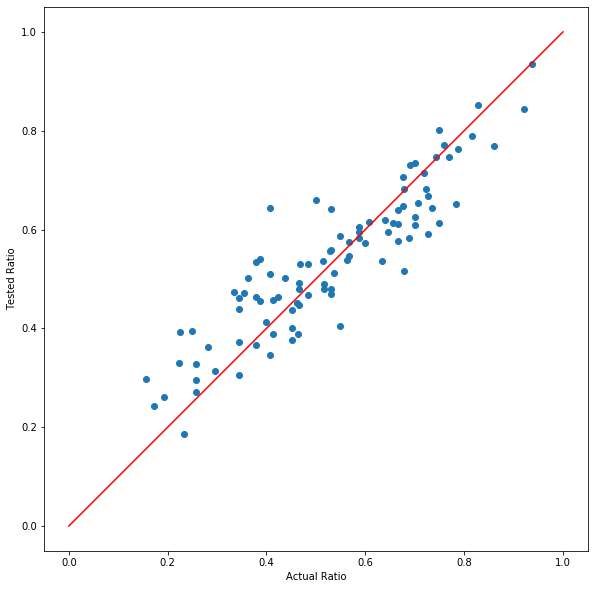

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(y_pred_val, y_test_data_predict)
plt.xlabel("Actual Ratio")
plt.ylabel("Tested Ratio")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 2)
y=x
plt.plot(x,y,color="red")

In [52]:
print(np.arange(0, 1))
print(np.arange(0, 2))

[0]
[0 1]


In [78]:
# 予測結果を逆標準化
# 予測値
y_test_data.predict = test_result * df_train_y.std() + df_train_y.mean()
# 正解
y_pred_val = y_test_data * df_train_y.std() + df_train_y.mean()

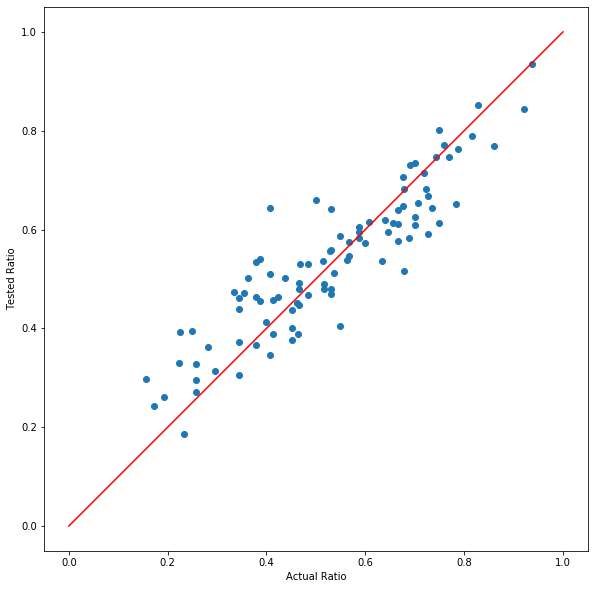

In [79]:
plt.figure(figsize=(10,10))
plt.scatter(y_pred_val, y_test_data.predict)
plt.xlabel("Actual Ratio")
plt.ylabel("Tested Ratio")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 2)
y=x
plt.plot(x,y,color="red")

In [53]:
rmse = np.sqrt(sum((y_pred_val - y_test_data.predict) ** 2) / len(y_pred_val))
print("RMSE = ", rmse)

RMSE =  0.07792301113804327


CONF_Amer   -0.094538
ADJOE        0.098156
FTR          0.098962
CONF_P12    -0.105919
EFG_O        0.110421
CONF_SWAC    0.117596
CONF_MEAC    0.125671
2P_O         0.133182
CONF_SEC    -0.138447
TORD         0.143836
CONF_B10    -0.150406
CONF_B12    -0.154783
EFG_D        0.168274
ORB          0.172614
CONF_ACC    -0.187784
CONF_Slnd    0.189488
2P_D        -0.209763
TOR         -0.216485
3P_D        -0.273280
BARTHAG      0.437188
Name: Coef, dtype: float64

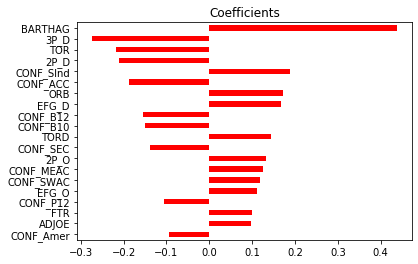

In [54]:
coef_df = pd.DataFrame({"Coef":linreg.coef_, "Coef_abs":np.abs(linreg.coef_)})
coef_df.index = df_train_x.columns
coef_df= coef_df.sort_values(by="Coef_abs")
coef_df["Coef"].tail(20).plot(kind="barh", title="Coefficients", color="red")
coef_df["Coef"].tail(20)

In [55]:
linreg_all = LinearRegression()

In [56]:
linreg_all.fit(df_train_x_std,df_train_y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
y_predict_result = linreg_all.predict(df_predict_x_std)

CONF_Amer   -0.096228
3P_O         0.096789
CONF_P12    -0.097866
CONF_BSky    0.103964
CONF_MEAC    0.105597
3P_D         0.122747
2P_O         0.123960
DRB         -0.133214
ORB          0.138305
TOR         -0.150407
CONF_Slnd    0.161248
CONF_B12    -0.162618
CONF_SEC    -0.170315
CONF_B10    -0.191234
CONF_ACC    -0.193839
TORD         0.245369
2P_D         0.262620
ADJOE        0.310385
BARTHAG      0.344662
EFG_D       -0.712234
Name: Coef, dtype: float64

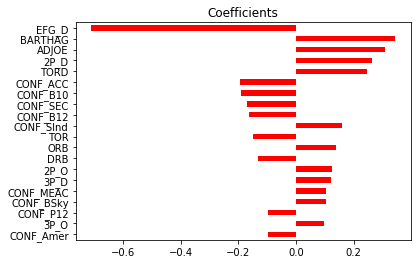

In [58]:
coef_all_df = pd.DataFrame({"Coef":linreg_all.coef_, "Coef_abs":np.abs(linreg_all.coef_)})
coef_all_df.index = df_predict_x.columns
coef_all_df = coef_all_df.sort_values(by="Coef_abs")
coef_all_df["Coef"].tail(20).plot(kind="barh", title="Coefficients", color="red")
coef_all_df["Coef"].tail(20)

In [59]:
# 予測結果を逆標準化
df_predict_y.predict = y_predict_result * df_predict_y.std() + df_predict_y.mean()
y_predict_result_val = df_predict_y

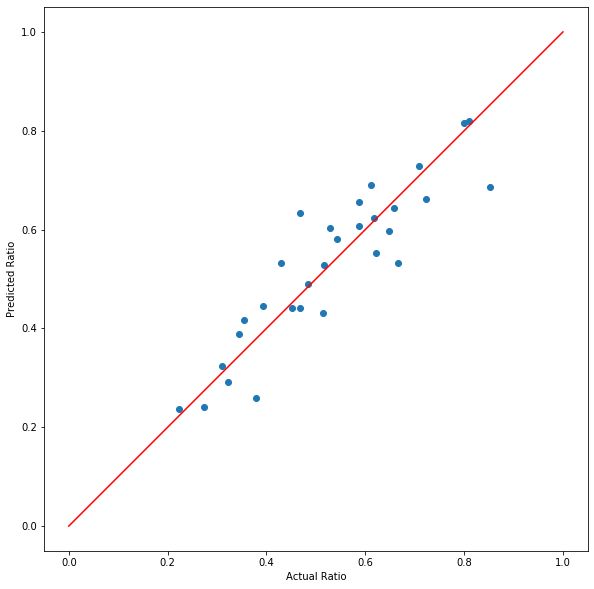

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(y_predict_result_val, df_predict_y.predict)
plt.xlabel("Actual Ratio")
plt.ylabel("Predicted Ratio")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 2)
y=x
plt.plot(x,y,color="red")

In [61]:
rmse = np.sqrt(sum((y_predict_result_val - df_predict_y.predict) ** 2) / len(y_predict_result_val))
print("RMSE = ", rmse)

RMSE =  0.07006580964513705


In [62]:
print(df)

                       TEAM   G  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0                   Gonzaga  37  123.4   89.9   0.9744   59.0   44.2  14.9   
1                  Virginia  38  123.0   89.9   0.9736   55.2   44.7  14.7   
2                      Duke  38  118.9   89.2   0.9646   53.6   45.0  17.5   
3            North Carolina  36  120.1   91.4   0.9582   52.9   48.9  17.2   
4                  Michigan  37  114.6   85.6   0.9665   51.6   44.1  13.9   
..                      ...  ..    ...    ...      ...    ...    ...   ...   
348              Alcorn St.  27   89.0  112.6   0.0628   45.7   52.7  24.1   
349           New Hampshire  27   83.7  106.1   0.0613   44.0   51.5  18.4   
350             Chicago St.  30   88.5  117.3   0.0380   44.2   57.8  22.5   
351            Delaware St.  29   84.3  112.2   0.0358   40.0   52.4  19.0   
352  Maryland Eastern Shore  30   85.7  114.4   0.0346   43.5   54.4  20.7   

     TORD   ORB  ...  CONF_Pat  CONF_SB  CONF_SC  CONF_SEC  CON

In [64]:
df.corr()

,G,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,...,CONF_Pat,CONF_SB,CONF_SC,CONF_SEC,CONF_SWAC,CONF_Slnd,CONF_Sum,CONF_WAC,CONF_WCC,ratio
G,1.000000,0.640437,-0.634291,0.707243,0.317408,-0.498786,-0.316186,0.178514,0.285768,-0.135271,...,-0.009864,-0.055669,-0.084675,0.188306,-0.037068,-0.255733,-0.090679,-0.012208,0.037742,0.507412
ADJOE,0.640437,1.000000,-0.568744,0.875756,0.698596,-0.391780,-0.575551,-0.029380,0.297432,-0.206887,...,-0.034977,0.019776,0.045159,0.241848,-0.237387,-0.147554,0.013881,-0.032364,0.075606,0.693909
ADJDE,-0.634291,-0.568744,1.000000,-0.868742,-0.231538,0.822663,0.224042,-0.263413,-0.263516,0.307995,...,0.087812,0.033395,0.031633,-0.228899,0.150880,0.162306,0.114944,0.032839,-0.075159,-0.622331
BARTHAG,0.707243,0.875756,-0.868742,1.000000,0.513541,-0.664659,-0.451669,0.125869,0.309525,-0.278033,...,-0.077872,-0.003042,0.010621,0.259986,-0.217080,-0.182629,-0.059113,-0.023889,0.079347,0.731502
EFG_O,0.317408,0.698596,-0.231538,0.513541,1.000000,-0.181070,-0.359249,-0.123660,-0.112229,-0.277558,...,0.111669,0.060676,0.145417,0.054848,-0.202539,-0.076431,0.127742,-0.043531,0.079085,0.599316
EFG_D,-0.498786,-0.391780,0.822663,-0.664659,-0.181070,1.000000,0.127329,-0.080295,-0.254627,0.207505,...,0.091026,0.048371,0.109659,-0.109002,0.058106,0.097567,0.146129,-0.003076,-0.042516,-0.615129
TOR,-0.316186,-0.575551,0.224042,-0.451669,-0.359249,0.127329,1.000000,0.072927,0.195409,0.177203,...,-0.016259,0.030464,0.017663,0.034526,0.205471,0.196166,-0.129606,0.000360,-0.070036,-0.449095
TORD,0.178514,-0.029380,-0.263413,0.125869,-0.123660,-0.080295,0.072927,1.000000,0.181559,0.353640,...,-0.049311,0.027064,-0.010092,0.083151,0.145968,0.156149,-0.202102,0.009360,-0.027250,0.226335
ORB,0.285768,0.297432,-0.263516,0.309525,-0.112229,-0.254627,0.195409,0.181559,1.000000,0.047436,...,-0.104889,0.003773,0.013637,0.201737,0.050541,0.056235,-0.160529,0.036042,-0.076234,0.291930
DRB,-0.135271,-0.206887,0.307995,-0.278033,-0.277558,0.207505,0.177203,0.353640,0.047436,1.000000,...,-0.069628,0.072054,0.009335,0.123887,0.172526,0.160941,-0.152992,0.017339,-0.129874,-0.306455


In [65]:
print(df.corr())

                  G     ADJOE     ADJDE   BARTHAG     EFG_O     EFG_D  \
G          1.000000  0.640437 -0.634291  0.707243  0.317408 -0.498786   
ADJOE      0.640437  1.000000 -0.568744  0.875756  0.698596 -0.391780   
ADJDE     -0.634291 -0.568744  1.000000 -0.868742 -0.231538  0.822663   
BARTHAG    0.707243  0.875756 -0.868742  1.000000  0.513541 -0.664659   
EFG_O      0.317408  0.698596 -0.231538  0.513541  1.000000 -0.181070   
EFG_D     -0.498786 -0.391780  0.822663 -0.664659 -0.181070  1.000000   
TOR       -0.316186 -0.575551  0.224042 -0.451669 -0.359249  0.127329   
TORD       0.178514 -0.029380 -0.263413  0.125869 -0.123660 -0.080295   
ORB        0.285768  0.297432 -0.263516  0.309525 -0.112229 -0.254627   
DRB       -0.135271 -0.206887  0.307995 -0.278033 -0.277558  0.207505   
FTR        0.204885  0.065536 -0.114718  0.102950 -0.054427 -0.154818   
FTRD      -0.213699 -0.395675  0.176524 -0.330788 -0.421188  0.118046   
2P_O       0.324457  0.637682 -0.297216  0.521902  